# Data Science Work Flow

- [Define Problem](#Define-Problem)
- [Gather Data](#Gather-Data)
- [Explore Data](#Explore-Data)
- [Model Data](#Model-Data)
- [Evaluate Model](#Evaluate-Model)
- [Answer Problem](#Answer-Problem)

## Table of contents
- [Introduction](#Introduction)
- [Required Libraries](#Required-Libraries)
- [Dataset](#Dataset)
- [Exploring the Dataset](#Exploring-the-Dataset)
    - [Checking and droping Null Values](#Checking-and-droping-Null-Values)
    - [Droping columns](#Droping-columns)
    - [Filtering-the-Dataframe](#Filtering-the-Dataframe)
    - [Checking Datatypes](#Checking-Datatypes)
    - [Spliting one column into two](#Spliting-one-column-into-two)
    - [Converting Date column into DateTime object](#Converting-Date-column-into-DateTime-object)
    - [Spliting the Single date column to year month and day](#Spliting-the-Single-date-column-to-year-month-and-day)
       - [Converting DataTypes](#Converting-DataTypes)
- [Data Visualization](#Data-Visualization)
- [Baseline Accuracy Score of Target varibale](#Baseline-Accuracy-Score-of-Target-varibale)
    - [ Binarize Target Variable](#Binarize-Target-Variable)
- [Pre processing step before modeling](#Pre-processing-step-before-modeling)
- [Model Data](#Model-Data)
- [Fine Tune Model](#Fine-Tune-Model)
- [Answer Problem](#Answer-)


# Define Problem

# Introduction

The Kickstarter is an American public-benefit corporation that supports and hosts a global crowdfunding platform to harbour and encourage creative projects and startups specifically for creative projects in the following categories: Art, Comics, Crafts, Dance, Design, Fashion, Film & Video, Food, Games, Journalism, Music, Photography, Publishing, Technology, and Theater.

The members of the audience who decide on funding the project are called backers and the amount they contribute is called the ‘pledged amount’. If project doesnot gather funds (pledged amount) that is equal to the goal than that project is failed and therefore backers will not be charged. So, the project beign pledged is completely dependent number of backers a project can get. The one who starts the project should give maximum time in making project more creative, beign very sincere to the question asked by the potential backers.

# Required Libraries

This notebook uses several Python packages that come standard with the Anaconda Python distribution. The primary libraries that we'll be using are:

- NumPy: Provides a fast numerical array structure and helper functions.
- pandas: Provides a DataFrame structure to store data in memory and work with it easily and efficiently.
- scikit-learn: The essential Machine Learning package in Python.
- matplotlib: Basic plotting library in Python; most other Python plotting libraries are built on top of it.
- Seaborn: Advanced statistical plotting library.

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
from datetime import datetime
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
from sklearn.metrics import auc, roc_auc_score, roc_curve 
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler

warnings.filterwarnings('ignore')
%matplotlib inline

# Gather Data

### Description of the Kickstrater Data columns

---

The corresponding descriptions are:

    ID: Internal Kickstarter ID  
    name: name of project 
    category: category 
    main_category: category of campaign
    currency: currency used to support 
    deadline: deadline for crowdfunding
    goal: fundraising goal - The funding goal is the amount of money that a creator needs to complete their           project. 
    launched: date launched
    pledged: amount pledged by "crowd"
    state: Current condition the project is in
    backers: number of backers
    country: country pledged from
    usd pledged: amount of money pledged

# Dataset

In [3]:
#read the csv
df= pd.read_csv('./ks-projects-train.csv', encoding = "ISO-8859-1", engine='python')
#check first five rows 
df.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09 11:36:00,1000,2015-08-11 12:12:28,0,failed,0,GB,0,NaN,NaN,NaN,NaN
1,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26 00:20:50,45000,2013-01-12 00:20:50,220,failed,3,US,220,NaN,NaN,NaN,NaN
2,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16 04:24:11,5000,2012-03-17 03:24:11,1,failed,1,US,1,NaN,NaN,NaN,NaN
3,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29 01:00:00,19500,2015-07-04 08:35:03,1283,canceled,14,US,1283,NaN,NaN,NaN,NaN
4,1000014025,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01 13:38:27,50000,2016-02-26 13:38:27,52375,successful,224,US,52375,NaN,NaN,NaN,NaN


# Explore Data

## Exploring the Dataset

In [4]:
#shape of DataFrame
df.shape

(323750, 17)

In [5]:
#checking the info of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 323750 entries, 0 to 323749
Data columns (total 17 columns):
ID                323750 non-null int64
name              323746 non-null object
category          323745 non-null object
main_category     323750 non-null object
currency          323750 non-null object
deadline          323750 non-null object
goal              323750 non-null object
launched          323750 non-null object
pledged           323750 non-null object
state             323750 non-null object
backers           323750 non-null object
country           323750 non-null object
usd pledged       319960 non-null object
Unnamed: 13       625 non-null object
Unnamed: 14       12 non-null object
Unnamed: 15       4 non-null object
Unnamed: 16       1 non-null float64
dtypes: float64(1), int64(1), object(15)
memory usage: 42.0+ MB


In [6]:
#striping the unwanted spaces 
df.columns = [col.strip() for col in df.columns]
# list if columns 
df.columns

Index(['ID', 'name', 'category', 'main_category', 'currency', 'deadline',
       'goal', 'launched', 'pledged', 'state', 'backers', 'country',
       'usd pledged', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15',
       'Unnamed: 16'],
      dtype='object')

### Checking and droping  Null Values

In [7]:
#checking nulls 
df.isnull().sum()

ID                    0
name                  4
category              5
main_category         0
currency              0
deadline              0
goal                  0
launched              0
pledged               0
state                 0
backers               0
country               0
usd pledged        3790
Unnamed: 13      323125
Unnamed: 14      323738
Unnamed: 15      323746
Unnamed: 16      323749
dtype: int64

In [9]:
#dropping nulls
df.dropna(inplace=True)

### Droping columns

In [8]:
#drop unwanted columns
df.drop(['ID','Unnamed: 16','Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15' ], axis=1, inplace= True)

### Filtering the Dataframe 

In [10]:
#filtering the dataframe 
df= df[(df['state']=='failed')| (df['state']=='successful')]
df.head()

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged
0,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09 11:36:00,1000,2015-08-11 12:12:28,0,failed,0,GB,0
1,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26 00:20:50,45000,2013-01-12 00:20:50,220,failed,3,US,220
2,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16 04:24:11,5000,2012-03-17 03:24:11,1,failed,1,US,1
4,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01 13:38:27,50000,2016-02-26 13:38:27,52375,successful,224,US,52375
5,Support Solar Roasted Coffee & Green Energy! ...,Food,Food,USD,2014-12-21 18:30:44,1000,2014-12-01 18:30:44,1205,successful,16,US,1205


### Checking Datatypes

In [11]:
#checking data types of columns
df.dtypes

name             object
category         object
main_category    object
currency         object
deadline         object
goal             object
launched         object
pledged          object
state            object
backers          object
country          object
usd pledged      object
dtype: object

### Spliting one column into two

In [12]:
#splitting the date and time from column ['launched'] and making seperate column
df[['Date_launched','Time_lanunched']] = df.launched.str.split(expand=True)

df.head()

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,Date_launched,Time_lanunched
0,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09 11:36:00,1000,2015-08-11 12:12:28,0,failed,0,GB,0,2015-08-11,12:12:28
1,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26 00:20:50,45000,2013-01-12 00:20:50,220,failed,3,US,220,2013-01-12,00:20:50
2,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16 04:24:11,5000,2012-03-17 03:24:11,1,failed,1,US,1,2012-03-17,03:24:11
4,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01 13:38:27,50000,2016-02-26 13:38:27,52375,successful,224,US,52375,2016-02-26,13:38:27
5,Support Solar Roasted Coffee & Green Energy! ...,Food,Food,USD,2014-12-21 18:30:44,1000,2014-12-01 18:30:44,1205,successful,16,US,1205,2014-12-01,18:30:44


In [13]:
#drop column launched
df.drop(['launched'], axis=1, inplace=True)

In [14]:
##splitting the date and time from column ['deadline'] and making seperate column
df[['Deadline_date','Deadline_time']] = df.deadline.str.split(expand=True)
df.head()

,name,category,main_category,currency,deadline,goal,pledged,state,backers,country,usd pledged,Date_launched,Time_lanunched,Deadline_date,Deadline_time
0,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09 11:36:00,1000,0,failed,0,GB,0,2015-08-11,12:12:28,2015-10-09,11:36:00
1,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26 00:20:50,45000,220,failed,3,US,220,2013-01-12,00:20:50,2013-02-26,00:20:50
2,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16 04:24:11,5000,1,failed,1,US,1,2012-03-17,03:24:11,2012-04-16,04:24:11
4,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01 13:38:27,50000,52375,successful,224,US,52375,2016-02-26,13:38:27,2016-04-01,13:38:27
5,Support Solar Roasted Coffee & Green Energy! ...,Food,Food,USD,2014-12-21 18:30:44,1000,1205,successful,16,US,1205,2014-12-01,18:30:44,2014-12-21,18:30:44


In [15]:
# drop column ['deadline']
df.drop(['deadline','usd pledged'], axis = 1, inplace= True)

### Converting Date column into DateTime object

In [16]:
#converting to datatime object
df['Deadline_date'] = pd.to_datetime(df['Deadline_date'])
#converting to datetime object
df['Date_launched']= pd.to_datetime(df['Date_launched'])
#calculating the number of days project was live
df['project_duration']= df['Deadline_date']- df['Date_launched']

In [17]:
#checking first 2 rows of updated dataframe
df.head(2)

,name,category,main_category,currency,goal,pledged,state,backers,country,Date_launched,Time_lanunched,Deadline_date,Deadline_time,project_duration
0,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,1000,0,failed,0,GB,2015-08-11,12:12:28,2015-10-09,11:36:00,59 days
1,Where is Hank?,Narrative Film,Film & Video,USD,45000,220,failed,3,US,2013-01-12,00:20:50,2013-02-26,00:20:50,45 days


## Spliting the Single date column to year month and day

In [18]:
# from ['Date_launched'] column extracting year, month and day and making new column to make extra feature 
df[['year_l','month_l','day_l']] = df.Date_launched.apply(lambda x: pd.Series(x.strftime("%Y,%m,%d").split(",")))

In [19]:
# from ['Deadline_date'] column extracting year, month and day and making new column to make extra feature 
df[['year_D','month_D','day_D']] = df.Deadline_date.apply(lambda x: pd.Series(x.strftime("%Y,%m,%d").split(",")))

In [20]:
df.dtypes

name                         object
category                     object
main_category                object
currency                     object
goal                         object
pledged                      object
state                        object
backers                      object
country                      object
Date_launched        datetime64[ns]
Time_lanunched               object
Deadline_date        datetime64[ns]
Deadline_time                object
project_duration    timedelta64[ns]
year_l                       object
month_l                      object
day_l                        object
year_D                       object
month_D                      object
day_D                        object
dtype: object

### Converting DataTypes

In [21]:
df['backers']= df['backers'].astype(int)

df['goal']= df['goal'].astype(float)

df['pledged']= df['pledged'].astype(float)

df['year_l']=df['year_l'].astype(int)

df['month_l']=df['month_l'].astype(int)

df['day_l']=df['day_l'].astype(int)

df['year_D']=df['year_D'].astype(int)

df['month_D']=df['month_D'].astype(int)

df['day_D']=df['day_D'].astype(int)

 If we see the datatypes of columns [Date_launched] and [Deadline_date], [project_duration] its date time object we need to convert them to string object

In [22]:
# converting the datatype
df['Date_launched']= df['Date_launched'].astype(str)
#converting the datatype
df['Deadline_date']=df['Deadline_date'].astype(str)
#converting the datatype
df['project_duration']=df['project_duration'].astype(str)

In [23]:
#converting the datatype and applying lambda function to get rid of unnessary string 
df['project_duration']= df['project_duration'].apply(lambda st: st.replace('days 00:00:00.000000000', '')).astype(int)

In [24]:
#checking datatypes again
df.dtypes

name                 object
category             object
main_category        object
currency             object
goal                float64
pledged             float64
state                object
backers               int64
country              object
Date_launched        object
Time_lanunched       object
Deadline_date        object
Deadline_time        object
project_duration      int64
year_l                int64
month_l               int64
day_l                 int64
year_D                int64
month_D               int64
day_D                 int64
dtype: object

Since we have already extracted the year, month and day we need to drop the columns ['Date_launched'] and ['Deadline_date']

In [25]:
# drop columns 
df.drop(['Date_launched','Deadline_date'], axis=1, inplace = True)

We have two columns ['Time_launched'] and ['Deadline_time'] which can gives us some good information about favourable time or certain days of the week to launch the project or end the project. Our goal here is to convert the time in hour.

In [26]:

df['Time_lanunched'] = pd.to_datetime(df['Time_lanunched'], format='%H:%M:%S').dt.time

df['hour_launched'] = pd.to_datetime(df['Time_lanunched'], format='%H:%M:%S').dt.hour

df['Deadline_Time'] = pd.to_datetime(df['Deadline_time'], format='%H:%M:%S').dt.time

df['hour_deadline'] = pd.to_datetime(df['Deadline_Time'], format='%H:%M:%S').dt.hour

In [27]:
#drop the columns
df.drop(['Time_lanunched','Deadline_Time', 'Deadline_time'], axis=1, inplace = True)

In [28]:
#check the work
df.head(2)

,name,category,main_category,currency,goal,pledged,state,backers,country,project_duration,year_l,month_l,day_l,year_D,month_D,day_D,hour_launched,hour_deadline
0,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,1000.0,0.0,failed,0,GB,59,2015,8,11,2015,10,9,12,11
1,Where is Hank?,Narrative Film,Film & Video,USD,45000.0,220.0,failed,3,US,45,2013,1,12,2013,2,26,0,0


In [74]:
#length of project name
df['len_project_name']= df['name'].apply(len)

In [75]:
#see correlations
df.corr()

,goal,pledged,state,backers,project_duration,year_l,month_l,day_l,year_D,month_D,day_D,hour_launched,hour_deadline,len_project_name
goal,1.000000,0.007925,-0.025280,0.006089,0.021979,0.018426,0.000062,-0.002834,0.018704,0.002039,-0.001269,0.002666,0.006277,-0.004956
pledged,0.007925,1.000000,0.104722,0.750484,0.007562,0.024857,-0.000324,-0.001678,0.024493,0.003983,0.001040,0.007742,-0.007205,0.028791
state,-0.025280,0.104722,1.000000,0.116516,-0.110823,-0.109387,-0.010483,-0.013467,-0.113188,-0.006469,-0.020493,0.005987,-0.053294,0.100160
backers,0.006089,0.750484,0.116516,1.000000,-0.000463,0.017214,-0.002573,-0.001157,0.016474,0.002764,-0.000355,0.010289,-0.009103,0.019375
project_duration,0.021979,0.007562,-0.110823,-0.000463,1.000000,-0.187022,-0.019592,-0.002751,-0.166258,-0.027925,-0.000593,-0.019646,-0.008842,0.020288
year_l,0.018426,0.024857,-0.109387,0.017214,-0.187022,1.000000,-0.129433,-0.007965,0.989499,-0.037834,0.015538,0.057757,0.068353,-0.078298
month_l,0.000062,-0.000324,-0.010483,-0.002573,-0.019592,-0.129433,1.000000,-0.036684,-0.067942,0.608143,-0.010713,0.006532,-0.004296,0.014718
day_l,-0.002834,-0.001678,-0.013467,-0.001157,-0.002751,-0.007965,-0.036684,1.000000,-0.007372,0.007213,0.438406,0.001633,0.001281,-0.002167
year_D,0.018704,0.024493,-0.113188,0.016474,-0.166258,0.989499,-0.067942,-0.007372,1.000000,-0.102546,0.006036,0.057458,0.067378,-0.078989
month_D,0.002039,0.003983,-0.006469,0.002764,-0.027925,-0.037834,0.608143,0.007213,-0.102546,1.000000,-0.003440,0.008235,0.000655,0.017760


## Mean duration of Failed and Successful Campaigns

In [141]:
failed = df.loc[df.state==0] # 0 is failed 
successful = df.loc[df.state==1] # 1 successful

print('Mean duration of failed campaigns',failed['project_duration'].mean())
print('Mean duration of successful campaigns',successful['project_duration'].mean())

Mean duration of failed campaigns 35.374402931361644
Mean duration of successful campaigns 32.46172638436482


# Data Visualization

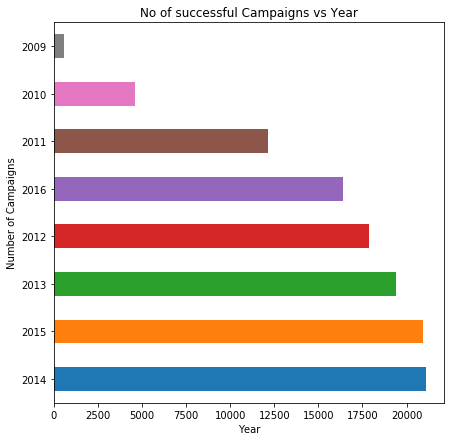

In [132]:
#no of campaigns vs year
successful['year_l'].value_counts().plot(kind='barh', figsize=(7,7))
plt.xlabel("Year")
plt.ylabel("Number of Campaigns")
plt.title("No of successful Campaigns vs Year")
plt.savefig("year.png")
plt.show()

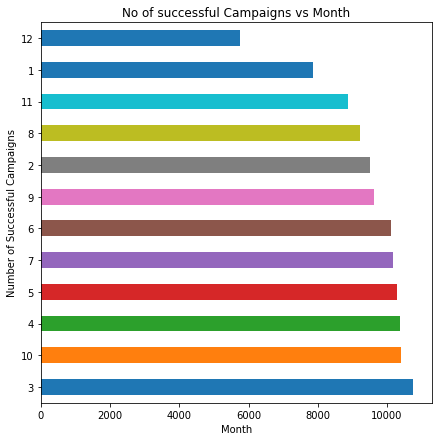

In [133]:
# no of campaigns vs month
successful['month_l'].value_counts().plot(kind='barh', figsize=(7,7))
plt.xlabel("Month")
plt.ylabel("Number of Successful Campaigns")
plt.title("No of successful Campaigns vs Month")
plt.savefig("month.png")
plt.show()

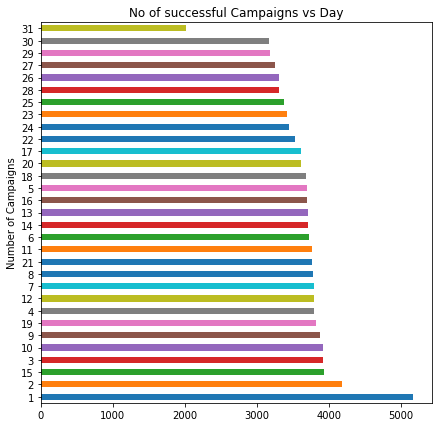

In [134]:
successful['day_l'].value_counts().plot(kind='barh',figsize=(7,7) )
plt.ylabel("Number of Campaigns")
plt.title("No of successful Campaigns vs Day")
plt.savefig("day.png")
plt.show()

In [69]:
df['main_category'].value_counts(normalize=True)*100

Film & Video    18.155460
Music           14.517822
Publishing      10.723650
Games            7.967939
Art              7.735984
Technology       7.615026
Design           7.114117
Food             6.708907
Fashion          5.624197
Theater          3.318166
Photography      3.075894
Comics           2.812277
Crafts           2.241639
Journalism       1.254051
Dance            1.134872
Name: main_category, dtype: float64

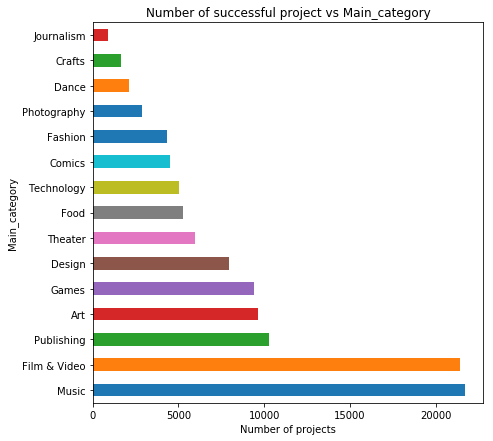

In [142]:
# number of projects vs main_category
successful['main_category'].value_counts().plot(kind='barh', figsize= (7,7))
plt.xlabel('Number of projects')
plt.ylabel('Main_category')
plt.title('Number of successful project vs Main_category')
plt.savefig("main_category.png")
plt.show()

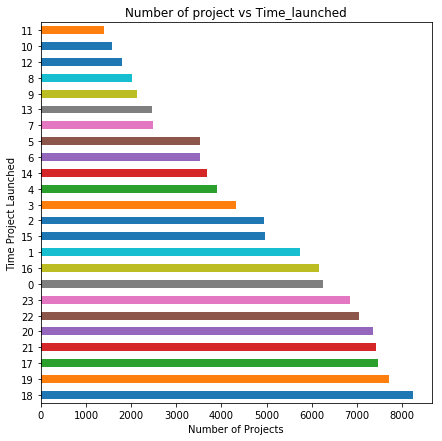

In [136]:
#project vs time
successful['hour_launched'].value_counts().plot(kind='barh', figsize= (7,7))
plt.xlabel('Number of Projects')
plt.ylabel('Time Project Launched')
plt.title('Number of project vs Time_launched')
plt.savefig( "Time.png")
plt.show()

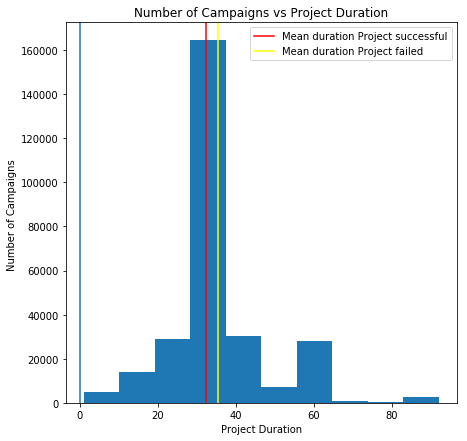

In [137]:
plt.figure(figsize= (7,7))
plt.hist(df['project_duration'], bins= 10)
plt.axvline(successful['project_duration'].mean(), color= 'red', label = 'Mean duration Project successful')
plt.axvline(failed['project_duration'].mean(), color = 'yellow', label = 'Mean duration Project failed')
plt.axvline()
plt.xlabel('Project Duration')
plt.ylabel('Number of Campaigns ')
plt.legend()
plt.title('Number of Campaigns vs Project Duration')
plt.savefig("project_duration.png")
plt.show()

In [118]:
successful['backers'].mean()

253.86004107066987

# Baseline Accuracy Score of Target varibale

In [40]:
df['state'].value_counts(normalize= True)

failed        0.598077
successful    0.401923
Name: state, dtype: float64

### Binarize Target Variable

In [41]:
#binarize the target varibale df_train['state']
df['state']= df['state'].map(lambda st: 1 if st == 'successful' else 0)

# Pre processing step before modeling

We need to convert our categorical features to numerical features so that we can use these features to fit in our model which could be helpful for our model to generalize very well with our unknown observation

In [76]:
# get only the categorical features from the main dataframe
df_cat= df.select_dtypes(include=('object'))
df_cat.head()

,name,category,main_category,currency,country
0,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,GB
1,Where is Hank?,Narrative Film,Film & Video,USD,US
2,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,US
4,Monarch Espresso Bar,Restaurants,Food,USD,US
5,Support Solar Roasted Coffee & Green Energy! ...,Food,Food,USD,US


In [77]:
# get the numerical features from the main dataframe
df_num= df.select_dtypes(exclude=('object'))
df_num.head()

,goal,pledged,state,backers,project_duration,year_l,month_l,day_l,year_D,month_D,day_D,hour_launched,hour_deadline,len_project_name
0,1000.0,0.0,0,0,59,2015,8,11,2015,10,9,12,11,31
1,45000.0,220.0,0,3,45,2013,1,12,2013,2,26,0,0,14
2,5000.0,1.0,0,1,30,2012,3,17,2012,4,16,3,4,49
4,50000.0,52375.0,1,224,35,2016,2,26,2016,4,1,13,13,20
5,1000.0,1205.0,1,16,20,2014,12,1,2014,12,21,18,18,60


In [78]:
#instantiate the label encoder
lb = LabelEncoder()

In [79]:
#fit transfrom the categorical features with label encoder
df_cat= df_cat.apply(lb.fit_transform)
df_cat.head()

,name,category,main_category,currency,country
0,242981,107,12,5,9
1,266320,92,6,12,20
2,251956,89,10,12,20
4,150165,122,7,12,20
5,212978,58,7,12,20


In [80]:
#merge the encoded categorical dataframe with the dataframe with numerical feature
df_final= pd.concat([df_cat,df_num], axis=1)
df_final.head()

,name,category,main_category,currency,country,goal,pledged,state,backers,project_duration,year_l,month_l,day_l,year_D,month_D,day_D,hour_launched,hour_deadline,len_project_name
0,242981,107,12,5,9,1000.0,0.0,0,0,59,2015,8,11,2015,10,9,12,11,31
1,266320,92,6,12,20,45000.0,220.0,0,3,45,2013,1,12,2013,2,26,0,0,14
2,251956,89,10,12,20,5000.0,1.0,0,1,30,2012,3,17,2012,4,16,3,4,49
4,150165,122,7,12,20,50000.0,52375.0,1,224,35,2016,2,26,2016,4,1,13,13,20
5,212978,58,7,12,20,1000.0,1205.0,1,16,20,2014,12,1,2014,12,21,18,18,60


In [177]:
#Partitioning the Independent(predictor)variable and (response) variable
features = [col for col in df_final.columns if col!= 'state' and col!= 'pledged']
# #Independent(predictor) variable
X= df_final[features]
# #dependent(response) variable
y = df_final['state']

In [178]:
y.value_counts()

0    168113
1    112976
Name: state, dtype: int64

In [179]:
#train test split
X_train, X_test, y_train, y_test= train_test_split(X, y, random_state=42, stratify= y)

# Model Data

In [161]:
#instantiate and fit the model
gbc= GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=8,
              max_features='sqrt', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=50, min_samples_split=500,
              min_weight_fraction_leaf=0.0, n_estimators=80,
              n_iter_no_change=None, presort='auto', random_state=10,
              subsample=0.8, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [162]:
# fit the model
model = gbc.fit(X_train, y_train)

In [154]:
#cross-validation
cross_val_score(gbc, X_train, y_train, cv=3).mean()

0.9328608834244081

In [163]:
# Accuracy score of training set
model.score(X_train, y_train)

0.9387997115968427

In [164]:
# Accuracy score of test set
model.score(X_test, y_test)

0.9341994791740782

# Evaluate Model

In [165]:
# prediction of test set
y_hat = model.predict(X_test)
y_hat_proba = model.predict_proba(X_test)

In [166]:
#adding actul_y, predicted_label, predicted_proba in Dataframe
X_test.loc[:, 'actual_y'] = y_test
X_test.loc[:, 'predicted_label'] = y_hat
X_test.loc[:, 'predicted_proba'] = y_hat_proba[:, 1]
X_test.head()

,name,category,main_category,currency,country,goal,backers,project_duration,year_l,month_l,day_l,year_D,month_D,day_D,hour_launched,hour_deadline,len_project_name,actual_y,predicted_label,predicted_proba
143771,64264,37,4,12,20,50000.0,23,45,2012,3,21,2012,5,5,4,5,56,0,0,0.012671
80841,129816,19,12,12,20,8849.0,1,30,2014,5,3,2014,6,2,5,5,51,0,0,0.005115
136261,216401,55,6,12,20,5000.0,45,51,2012,10,10,2012,11,30,9,15,10,1,1,0.867308
298695,134752,7,5,5,9,1200.0,59,18,2014,5,15,2014,6,2,19,20,40,1,1,0.975536
255472,126186,113,0,5,9,3000.0,97,23,2014,5,13,2014,6,5,20,14,23,1,1,0.969680


In [168]:
#confusion Matrix
tn, fp, fn, tp = confusion_matrix(X_test['actual_y'], X_test['predicted_label']).ravel()

print("True Negatives: %s" % tn)
print("False Positives: %s" % fp)
print("False Negatives: %s" % fn)
print("True Positives: %s" % tp)

True Negatives: 39483
False Positives: 2546
False Negatives: 2078
True Positives: 26166


- True positive are project we correctly predict to be successful (True Positive).
- True negative are project we correctly predict to be failed (True negative )
- False positives are project we incorrectly predict to be successful (False positive ).
- False negatives are people we incorrectly predict to be failed (False negative ).

In [169]:
#classification Report
print( 'Accuracy:', accuracy_score(X_test['actual_y'], X_test['predicted_label']))
print( 'F1 score:', f1_score(X_test['actual_y'], X_test['predicted_label']))
print( 'Recall:', recall_score(X_test['actual_y'], X_test['predicted_label']))
print ('Precision:', precision_score(X_test['actual_y'], X_test['predicted_label']))
print ('\n clasification report:\n', classification_report(X_test['actual_y'], X_test['predicted_label']))

Accuracy: 0.9341994791740782
F1 score: 0.9188145234918184
Recall: 0.9264268517207195
Precision: 0.9113262747283366

 clasification report:
               precision    recall  f1-score   support

           0       0.95      0.94      0.94     42029
           1       0.91      0.93      0.92     28244

   micro avg       0.93      0.93      0.93     70273
   macro avg       0.93      0.93      0.93     70273
weighted avg       0.93      0.93      0.93     70273



In [170]:
#increase or decrese the thershold and see the effect how our false positive and negative change through confusion matrix
X_test.loc[:, 'predicted_label'] = X_test['predicted_proba'].map(lambda p: 1 if p > .6 else 0)

confusion_matrix(X_test['actual_y'], X_test['predicted_label'])

array([[39982,  2047],
       [ 2695, 25549]])

In [171]:
#features importance
sorted(list(zip(X_train.columns,model.feature_importances_)),key=lambda x: x[1], reverse=True)

[('backers', 0.7943061673216495),
 ('goal', 0.13822663450800046),
 ('main_category', 0.014926160740875301),
 ('project_duration', 0.014241775448949648),
 ('category', 0.009856005402029243),
 ('year_l', 0.005786467567491731),
 ('len_project_name', 0.005767975461020784),
 ('year_D', 0.005421863050447382),
 ('currency', 0.0024716235648529136),
 ('country', 0.0020755925494421305),
 ('hour_launched', 0.0019441814612843153),
 ('name', 0.001336417738902069),
 ('hour_deadline', 0.0013061968751912683),
 ('month_D', 0.0006678368455222949),
 ('day_l', 0.0005741980404943615),
 ('day_D', 0.0005474433353314523),
 ('month_l', 0.0005434600885150013)]

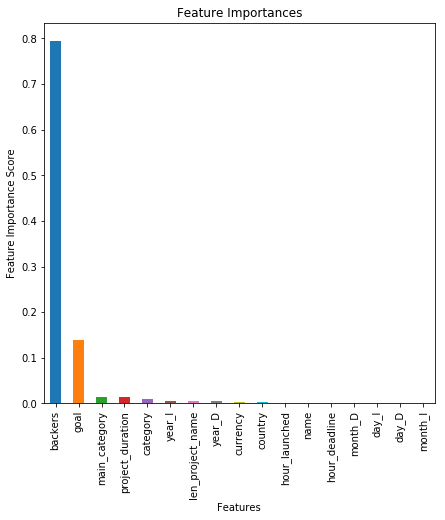

In [172]:
#visualizing  important features
plt.figure(figsize=(7,7))
feat_imp = pd.Series(model.feature_importances_, X_train.columns ).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Feature Importances')
plt.xlabel('Features')
plt.ylabel('Feature Importance Score')
plt.savefig("feat.png")
plt.show()

# AUC- ROC Curve

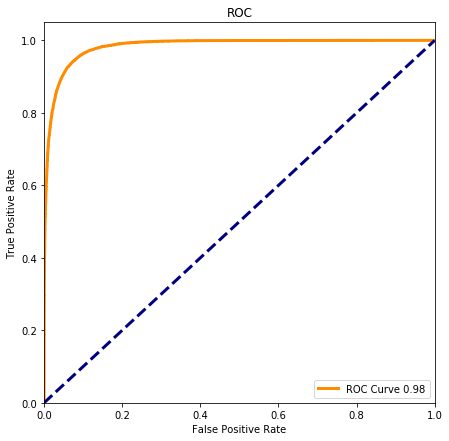

In [173]:
# Generate False positive rate and True positive rate
fpr, tpr, _ = roc_curve(X_test['actual_y'], X_test['predicted_proba'])
roc_auc = auc(fpr, tpr)

# Plot 
plt.figure(figsize=(7,7))
line_width = 3

plt.plot(fpr, tpr, lw = line_width, color="darkorange", label = "ROC Curve %.2f" % roc_auc)
plt.plot([0,1], [0, 1], lw = line_width, linestyle="--", color="navy")

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.savefig('auc.png')
plt.show()

## Check Misclassification

In [174]:
# Get the row index of misclassifies posts
dic = {'Actual': y_test,
      'Pred': y_hat}
inc = pd.DataFrame(dic)

row_ids = inc[inc['Pred'] != inc['Actual']].index
row_ids

Int64Index([251715, 287055, 293323, 184781,  14248, 159336, 253785, 257428,
            169979, 121125,
            ...
            164024,   9842,  68040, 230496,  60074, 145000, 278894, 288320,
            260822,  18121],
           dtype='int64', length=4624)

# Fine Tune Model

In [146]:
#gridsearch
param_test1 = {'n_estimators':range(20,81,10)}
gsearch = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1,
                                                               min_samples_split=500,min_samples_leaf=50,
                                                               max_depth=8,max_features='sqrt',
                                                               subsample=0.8,random_state=10), 
param_grid = param_test1, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch.fit(X_train, y_train)
print(gsearch.best_score_)
gsearch.best_params_

{'n_estimators': 80}

In [157]:
#best estimator
gsearch.best_estimator_

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=8,
              max_features='sqrt', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=50, min_samples_split=500,
              min_weight_fraction_leaf=0.0, n_estimators=80,
              n_iter_no_change=None, presort='auto', random_state=10,
              subsample=0.8, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [147]:
#examining grid search results
scores= pd.DataFrame(gsearch.cv_results_)
scores

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,41.730379,0.600696,0.186335,0.028979,20,{'n_estimators': 20},0.976100,0.977405,0.975657,0.976874,...,0.976617,0.000642,7,0.979355,0.978707,0.978092,0.977964,0.978786,0.978581,0.000505
1,63.467030,1.771935,0.148797,0.007252,30,{'n_estimators': 30},0.978640,0.979788,0.978206,0.980075,...,0.979215,0.000698,6,0.981878,0.981326,0.980772,0.981324,0.981258,0.981312,0.000351
2,77.330259,2.318063,0.211439,0.036258,40,{'n_estimators': 40},0.980165,0.981477,0.979834,0.981321,...,0.980748,0.000644,5,0.983404,0.983115,0.982624,0.982711,0.982972,0.982965,0.000281
3,100.792294,3.538298,0.215658,0.010211,50,{'n_estimators': 50},0.980888,0.982303,0.980909,0.982258,...,0.981675,0.000641,4,0.984394,0.984199,0.983816,0.983906,0.984223,0.984107,0.000214
4,114.546813,2.518415,0.256332,0.018574,60,{'n_estimators': 60},0.981549,0.982772,0.981563,0.982919,...,0.982253,0.000588,3,0.985196,0.984964,0.984762,0.984813,0.984936,0.984934,0.000151
5,130.156433,2.624730,0.301832,0.032609,70,{'n_estimators': 70},0.981886,0.983081,0.982064,0.983289,...,0.982624,0.000555,2,0.985723,0.985584,0.985501,0.985457,0.985514,0.985556,0.000093
6,128.192043,19.388864,0.291104,0.068276,80,{'n_estimators': 80},0.982182,0.983303,0.982322,0.983595,...,0.982902,0.000555,1,0.986295,0.986102,0.986058,0.986000,0.986080,0.986107,0.000100


In [175]:
#after grid search the accuracy score on training
gsearch.score(X_train, y_train)

0.9858882852078048

In [180]:
# after grid search the accuracy score on test
gsearch.score(X_test, y_test)

0.9834001225386526

# Answer Problem

Algorithm has given the most important features as backers and it makes sense as Kickstarter has adopted All-or-nothing funding meaning that no one will be charged for a pledge towards a project unless it reaches its funding goal and to make project successful it needs backers to support and share about the project (word-of-mouth). So, the project being pledged is completely dependent number of backers a project can get. The one who starts the project should give maximum time in making project more creative, being very sincere to the question asked by the potential backers as backers that support a project on Kickstarter get an inside look at the creative process.